# Porto Seguro’s Safe Driver Prediction
----

This is a competition from Kaggle. It's a binary classification problem.

## Exploratory data analysis
----

### Import needed and useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

### Various configuration settings

In [2]:
pd.options.display.max_columns = 99999 # just to be sure all columns name will be displayed

### Load dataset file

In [3]:
dataset = pd.read_csv("data/train.csv")


As explained on Kaggle's competion page, missing values are set to -1.
Let's replace these with ```np.nan```, in order for Pandas to handle them correctly as missing values.

In [4]:
dataset.replace(-1, np.nan, inplace=True)

### First look at data

In [6]:
dataset.head(n=7)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1.0,4,0.0,0.0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,10.0,0.0,NaN,0,0.0,14,1.0,1,0.0,1,104,2.0,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1.0,3,1.0,0.0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.6,0.1,0.617454,6.0,1.0,NaN,0,1.0,11,1.0,1,0.0,1,99,2.0,0.316228,0.639683,0.368782,3.162278,0.2,0.6,0.5,2,2,8,1,8,3,10,3,0,0,10,0,1,0,0,1,0


We realize that:
- column 'id' is metadata and we can ignore it
- column 'target' is the target feature. It's a binary type feature.
- columns from third on are descriptive features

Remove the 'id' column from the dataset

In [7]:
dataset.drop('id', axis=1, inplace=True)

Let's look at the dataset again and check the 'id' column has been removed:

In [8]:
dataset.head(n=3)

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0


### Important facts about the dataset

#### ** Number of datapoints **

In [9]:
dataset_size = len(dataset)
print(dataset_size)

595212


#### ** Target feature **

The target feature is labeled 'target' and it is the first column in the dataset.
It's a binary feature and its levels should be the set (0,1):

In [10]:
dataset.target.unique()

array([0, 1])

Let's display how the different levels are distributed with a countplot:

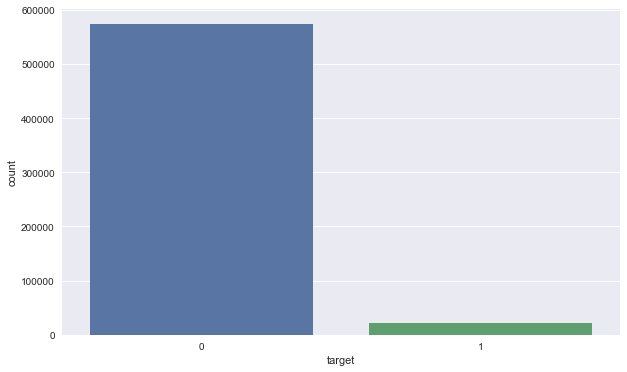

In [24]:
cp = sb.countplot(x='target', data=dataset)
cp.figure.set_size_inches(10,6)

The countplot shows that the dataset is imbalanced because we have many more negative datapoints than positive ones. 

Negative and positive samples numbers are:

In [25]:
neg_sample_num, pos_sample_num = dataset.target.value_counts()
print("Negative samples number: {}".format(neg_sample_num))
print("Positive samples number: {}".format(pos_sample_num))

Negative samples number: 573518
Positive samples number: 21694


Let's compute the **__Imbalance Ratio__**:

In [26]:
imbalance_ratio = float(pos_sample_num)/(pos_sample_num + neg_sample_num)
print("Imbalance ratio: {:.2f}%".format(imbalance_ratio*100))

Imbalance ratio: 3.64%


We'll need to take care of this significative data imbalancing when building our model.

#### ** Descriptive features **

The number of distinct descriptive features is:

In [27]:
dataset.shape[1] - 1 # remove 'target' column from the count

57

 Descriptive feature names are:

In [28]:
descriptive_feature_names = dataset.columns.values[1:]
print(descriptive_feature_names)

['ps_ind_01' 'ps_ind_02_cat' 'ps_ind_03' 'ps_ind_04_cat' 'ps_ind_05_cat'
 'ps_ind_06_bin' 'ps_ind_07_bin' 'ps_ind_08_bin' 'ps_ind_09_bin'
 'ps_ind_10_bin' 'ps_ind_11_bin' 'ps_ind_12_bin' 'ps_ind_13_bin'
 'ps_ind_14' 'ps_ind_15' 'ps_ind_16_bin' 'ps_ind_17_bin' 'ps_ind_18_bin'
 'ps_reg_01' 'ps_reg_02' 'ps_reg_03' 'ps_car_01_cat' 'ps_car_02_cat'
 'ps_car_03_cat' 'ps_car_04_cat' 'ps_car_05_cat' 'ps_car_06_cat'
 'ps_car_07_cat' 'ps_car_08_cat' 'ps_car_09_cat' 'ps_car_10_cat'
 'ps_car_11_cat' 'ps_car_11' 'ps_car_12' 'ps_car_13' 'ps_car_14'
 'ps_car_15' 'ps_calc_01' 'ps_calc_02' 'ps_calc_03' 'ps_calc_04'
 'ps_calc_05' 'ps_calc_06' 'ps_calc_07' 'ps_calc_08' 'ps_calc_09'
 'ps_calc_10' 'ps_calc_11' 'ps_calc_12' 'ps_calc_13' 'ps_calc_14'
 'ps_calc_15_bin' 'ps_calc_16_bin' 'ps_calc_17_bin' 'ps_calc_18_bin'
 'ps_calc_19_bin' 'ps_calc_20_bin']


Let's split descriptive features in categorical and continuous ones. 
According to the dataset description from Kaggle page, features whose name ends with '_bin' or '_cat' are categorical ones, while we can treat the other ones as numerical/continuous


**Categorical** feature names are:

In [29]:
categorical_feature_names = [name for name in descriptive_feature_names if name.endswith(('_bin', '_cat'))]
print(categorical_feature_names)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


**Continuous** feature names are:

In [31]:
continuous_feature_names = [name for name in descriptive_feature_names if not name.endswith(('_bin', '_cat'))]
print(continuous_feature_names)

['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


### Data Quality Report

Let's define a class that will help in visualizing the central tendency and the variance of the descriptive features in dataset

In [32]:
class DataQualityReport(object):    
    '''
    Report about data basic statistics
    '''
    
    CONT_TABLE_COLS = ['count', 'missing', 'cardinality', 'min', '1st_quartile', 'mean', 'median', '3rd_quartile', 'max', 'std_dev']
    CAT_TABLE_COLS  = ['count', 'missing', 'cardinality', 'mode', 'mode_freq', 'mode_percent', '2nd_mode', '2nd_mode_freq', '2nd_mode_percent']
        
    def __init__(self, df, continuous_features, categorical_features):
        '''
        Constructor
        Parameters:
            df - pandas DataFrame object containing the dataset
            categorical_features - the list of feature names of categorical type
            continuous_features - the list of feature names of continuous type
        '''
        self._df = df
        self._continuous_features   = continuous_features
        self._categorical_features  = categorical_features

        self.cont_table = pd.DataFrame(columns=DataQualityReport.CONT_TABLE_COLS, index=continuous_features)
        self.cat_table  = pd.DataFrame(columns=DataQualityReport.CAT_TABLE_COLS, index=categorical_features)
        self.refresh()
        
    def _populate_cont_table(self, stats):
        for feature in self._continuous_features:
            self.cont_table['count'][feature]           = self._df[feature].value_counts().sum()
            self.cont_table['missing'][feature]         = self._df[feature].isnull().sum()
            self.cont_table['cardinality'][feature]     = self._df[feature].unique().shape[0]
            self.cont_table['min'][feature]             = stats[feature]['min']
            self.cont_table['1st_quartile'][feature]    = stats[feature]['25%']
            self.cont_table['mean'][feature]            = stats[feature]['mean']
            self.cont_table['median'][feature]          = stats[feature]['50%']
            self.cont_table['3rd_quartile'][feature]    = stats[feature]['75%']
            self.cont_table['max'][feature]             = stats[feature]['max']
            self.cont_table['std_dev'][feature]         = stats[feature]['std']
            
            
    def _populate_cat_table(self):
        for feature in self._categorical_features:
            self.cat_table['count'][feature]           = self._df[feature].value_counts().sum()
            self.cat_table['missing'][feature]         = self._df[feature].isnull().sum()
            self.cat_table['cardinality'][feature]     = self._df[feature].unique().shape[0]
            vc = self._df[feature].value_counts()
            self.cat_table['mode'][feature]            = vc.index[0]
            self.cat_table['mode_freq'][feature]       = vc.values[0]
            self.cat_table['mode_percent'][feature]    = float(vc.values[0])/vc.sum()*100
            if vc.shape[0] > 1:
                self.cat_table['2nd_mode'][feature]            = vc.index[1]
                self.cat_table['2nd_mode_freq'][feature]       = vc.values[1]
                self.cat_table['2nd_mode_percent'][feature]    = float(vc.values[1])/vc.sum()*100
    
    def refresh(self):
        stats = self._df.describe()
        self._populate_cont_table(stats)
        self._populate_cat_table()

Let's build a ```DataQualityReport``` object: 

In [34]:
dqr = DataQualityReport(dataset, continuous_feature_names, categorical_feature_names)

Lets' display the data quality report for continuous features:

In [35]:
dqr.cont_table

,count,missing,cardinality,min,1st_quartile,mean,median,3rd_quartile,max,std_dev
ps_ind_01,595212,0,8,0,0,1.90038,1,3,7,1.98379
ps_ind_03,595212,0,12,0,2,4.42332,4,6,11,2.6999
ps_ind_14,595212,0,5,0,0,0.012451,0,0,4,0.127545
ps_ind_15,595212,0,14,0,5,7.29992,7,10,13,3.54604
ps_reg_01,595212,0,10,0,0.4,0.610991,0.7,0.9,0.9,0.287643
ps_reg_02,595212,0,19,0,0.2,0.439184,0.3,0.6,1.8,0.404264
ps_reg_03,487440,107772,5013,0.0612372,0.633443,0.894047,0.801561,1.08397,4.03795,0.345413
ps_car_11,595207,5,5,0,2,2.3461,3,3,3,0.832495
ps_car_12,595211,1,184,0.1,0.316228,0.379947,0.374166,0.4,1.26491,0.0582996
ps_car_13,595212,0,70482,0.250619,0.670867,0.813265,0.765811,0.90619,3.72063,0.224588


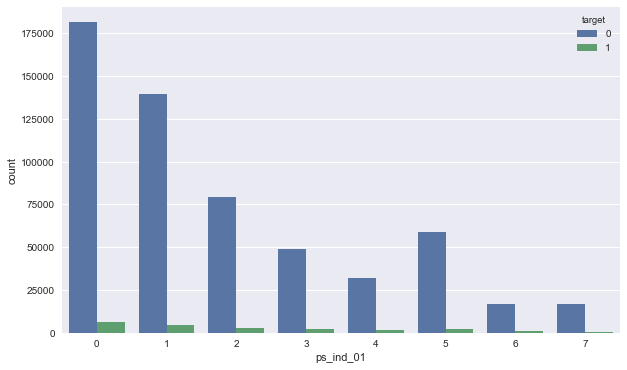

In [37]:
cp = sb.countplot(x='ps_ind_01', hue='target', data=dataset)
cp.figure.set_size_inches(10,6)

Let's display the data quality report for categorical features:

In [57]:
dqr.cat_table

,count,missing,cardinality,mode,mode_freq,mode_percent,2nd_mode,2nd_mode_freq,2nd_mode_percent
ps_ind_02_cat,594996,216,5,1,431859,72.5818,2,123573,20.7687
ps_ind_04_cat,595129,83,3,0,346965,58.3008,1,248164,41.6992
ps_ind_05_cat,589403,5809,8,0,528009,89.5837,6,20662,3.50558
ps_ind_06_bin,595212,0,2,0,360852,60.6258,1,234360,39.3742
ps_ind_07_bin,595212,0,2,0,442223,74.2967,1,152989,25.7033
ps_ind_08_bin,595212,0,2,0,497644,83.6079,1,97568,16.3921
ps_ind_09_bin,595212,0,2,0,484917,81.4696,1,110295,18.5304
ps_ind_10_bin,595212,0,2,0,594990,99.9627,1,222,0.0372976
ps_ind_11_bin,595212,0,2,0,594205,99.8308,1,1007,0.169183
ps_ind_12_bin,595212,0,2,0,589594,99.0561,1,5618,0.943865


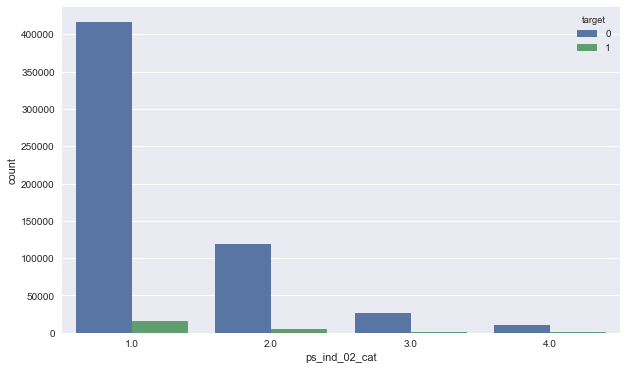

In [40]:
cp = sb.countplot(x='ps_ind_02_cat', hue='target', data=dataset)
cp.figure.set_size_inches(10,6)